Cats vs. Dogs dataset

- How to build a CNN, prepare your data with *ImageDataGenerator* ad examin your results.

We are going to:

1. Explore the example data.
2. Build and trin a neural network to classify between two pets.
3. Evaluate the training and validation accuracy.

In [2]:
# Download cats vs. dogs dataset
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2023-08-17 17:04:37--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.133.48, 142.251.133.240, 142.250.79.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.133.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65,43M  19,0MB/s    in 3,8s    

2023-08-17 17:04:41 (17,0 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [4]:
# Extract the file to the current directory
import zipfile

#Unzip the archive
local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

In [1]:
# The train and test subdirectories are already created
import os

base_dir = 'cats_and_dogs_filtered'

print('Content of base directory')
print(os.listdir(base_dir))

print('\nContent of the train directory')
print(os.listdir(f'{base_dir}/train'))

print('\nContent of the test directory')
print(os.listdir(f'{base_dir}/validation'))

Content of base directory
['train', 'vectorize.py', 'validation']

Content of the train directory
['dogs', 'cats']

Content of the test directory
['dogs', 'cats']


In [2]:
# We can assign each of these directories to a variable so you can use it later.
import os

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cats/dogs pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cats/dogs pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

Now see what the filenames looks like in the cats and dogs train directories (file naming conventions are the same in validation directory):

In [3]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

validation_cat_fnames = os.listdir(validation_cats_dir)
validation_dog_fnames = os.listdir(validation_dogs_dir)

Lets find out the total number of cat and dog images in the train and validation directoies:

In [4]:
print(f'total training cat images: ', len(train_cat_fnames))
print(f'total training dog images: ', len(train_dog_fnames))

print(f'total validation cat images: ', len(validation_cat_fnames))
print(f'total validation dog images: ', len(validation_dog_fnames))

total training cat images:  1000
total training dog images:  1000
total validation cat images:  500
total validation dog images:  500


Noe take a look at a few pictures to get a better sense of what the cat and dos datasets look like. First, configure the *matplotlib* parameters:

In [37]:
#%matplotlib notebook

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we will output images in a 4*4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

Now, display a batch of 8 cat and 8 dog pictures. You can re-run the cell to see a fresh batch each time:

In [38]:
# Set up matplotlib fig, and size it to fit 4*4 pics.
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+8

next_cat_pix = [os.path.join(train_cats_dir, fname)
               for fname in train_cat_fnames[pic_index-8:pic_index]
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname)
               for fname in train_dog_fnames[pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
    # Set up subplot, subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('Off') # Dont show axes (or gridlines)
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()

<Figure size 1600x1600 with 0 Axes>

Building a small model from scratch.

To train a neural network to handle the images, you'll need them to be in a uniform size. You will choose 150x150 pixels for this, and you'll see the code that preprocesses the images to that shape shortly.

In [14]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of th image 150*150 with 3 byte color
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the result to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation = 'relu'),
    # Only 1 output neuron. It will contains a value from 0-1 where 0 for 1 class ('cats')
    tf.keras.layers.Dense(1, activation = 'sigmoid')    
    
])



2023-08-18 10:42:26.244334: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-08-18 10:42:26.244417: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-08-18 10:42:26.244474: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (T0003352549): /proc/driver/nvidia/version does not exist
2023-08-18 10:42:26.245115: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


You defined a Sequential layer as before, adding some convolutional layers first. Note the input_shape parameter this time. Here is where you put the 150x150 size and 3 for the color depth because you have colored images. You then add a couple of convolutional layers and flatten the final result to feed into the densely connected layers.

Note that because you are facing a two-class classification problem, i.e. a binary classification problem, you will end the network with a sigmoid activation. The output of the network will be a single scalar between 0 and 1, encoding the probability that the current image is class 1 (as opposed to class 0).

You can review the architecture of the network with the model.summary() method:



In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 64)       0

The output_shape column shows how the size of your feature map evolves in each successive layer. The convolution operation removes the outermost pixels from the original dimensions, and each pooling layer halves it.

Next, you'll configure the specifications for model training. You will train our model with the binary_crossentropy loss, because it's a binary classification problem and your final activation is a sigmoid. We will use the rmsprop optimizer with a learning rate of 0.001. During training, you will want to monitor classification accuracy.

NOTE: In this case, using the RMSprop optimization algorithm is preferable to stochastic gradient descent (SGD), because RMSprop automates learning-rate tuning for us. (Other optimizers, such as Adam and Adagrad, also automatically adapt the learning rate during training, and would work equally well here.)

In [17]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer = RMSprop(learning_rate = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy']
              )

Data Proprocessing

Next step is to set up the data generators that will read pictures in the source folders, convert them to float32 tensors, and feed them (with their labels) to the model. You'll have one generator for the training images and one for the validation images. These generators will yield batches of images of size 150x150 and their labels (binary).

As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network (i.e. It is uncommon to feed raw pixels into a ConvNet.) In this case, you will preprocess the images by normalizing the pixel values to be in the [0, 1] range (originally all values are in the [0, 255] range).

In Keras, this can be done via the keras.preprocessing.image.ImageDataGenerator class using the rescale parameter. This ImageDataGenerator class allows you to instantiate generators of augmented image batches (and their labels) via .flow(data, labels) or .flow_from_directory(directory).

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescale by 1./255
train_datagen = ImageDataGenerator(rescale = 1.0/255.)
test_datagen = ImageDataGenerator(rescale = 1.0/255.)

#-------------------
# Flow training images in batches of 20 using train datagen generator
#------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary',
                                                    target_size = (150,150)
                                                    )

#-------------------
# Flow validation images in batches of 20 using validation datagen generator
#-------------------
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size = 20,
                                                        class_mode = 'binary',
                                                        target_size = (150,150))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Training

You will now train on all 2,000 images available, for 15 epochs, and monitor the accuracy as well on the 1,000 images in the validation set.

Do note the values per epoch.

You'll see 4 values per epoch -- Loss, Accuracy, Validation Loss and Validation Accuracy.

The loss and accuracy are great indicators of progress in training. loss measures the current model prediction against the known labels, calculating the result. accuracy, on the other hand, is the portion of correct guesses.

In [23]:
history = model.fit(
            train_generator,
            epochs = 15,
            validation_data = validation_generator,
            verbose =2
)

Epoch 1/15
100/100 - 79s - loss: 0.7628 - accuracy: 0.5645 - val_loss: 0.6437 - val_accuracy: 0.6140 - 79s/epoch - 792ms/step
Epoch 2/15
100/100 - 59s - loss: 0.6365 - accuracy: 0.6480 - val_loss: 0.6164 - val_accuracy: 0.6340 - 59s/epoch - 587ms/step
Epoch 3/15
100/100 - 58s - loss: 0.5608 - accuracy: 0.7230 - val_loss: 0.7107 - val_accuracy: 0.6050 - 58s/epoch - 582ms/step
Epoch 4/15
100/100 - 58s - loss: 0.4914 - accuracy: 0.7705 - val_loss: 0.7909 - val_accuracy: 0.6370 - 58s/epoch - 584ms/step
Epoch 5/15
100/100 - 59s - loss: 0.4172 - accuracy: 0.8050 - val_loss: 0.6229 - val_accuracy: 0.6960 - 59s/epoch - 588ms/step
Epoch 6/15
100/100 - 58s - loss: 0.3515 - accuracy: 0.8585 - val_loss: 0.7708 - val_accuracy: 0.6620 - 58s/epoch - 579ms/step
Epoch 7/15
100/100 - 58s - loss: 0.2633 - accuracy: 0.8875 - val_loss: 0.6987 - val_accuracy: 0.7250 - 58s/epoch - 582ms/step
Epoch 8/15
100/100 - 58s - loss: 0.1779 - accuracy: 0.9280 - val_loss: 0.8838 - val_accuracy: 0.7120 - 58s/epoch - 578

Model Prediction

Now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, upload them, and run them through the model, giving an indication of whether the object is a cat or a dog.

Evaluating Accuracy and Loss for the Model

You will plot the training/validation accuracy and loss as collected during training:

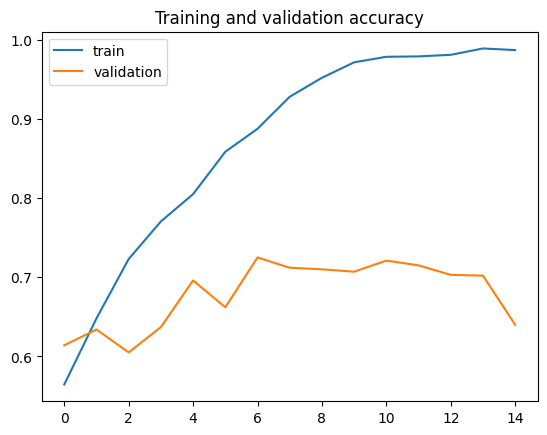

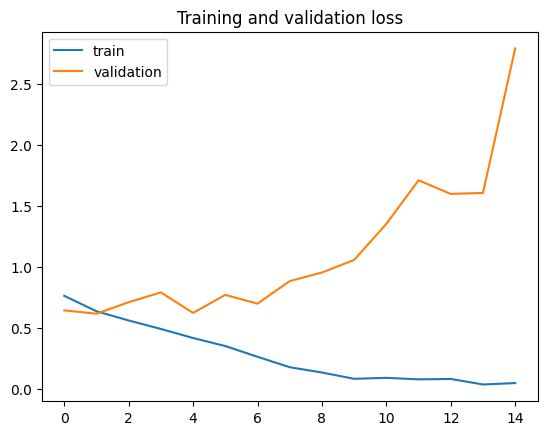

In [36]:
# ------------------------------------------------------------------------------------------
# Retrieve a list of the list results on training and test data sets for each training epoch
# ------------------------------------------------------------------------------------------
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc)) # Getting the number of epochs

# -------------------------------------
# Plot training and validation accuracy
# -------------------------------------
plt.plot(epochs, acc, label = 'train')
plt.plot(epochs, val_acc, label = 'validation')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

# -------------------------------------
# Plot training and validation loss
# -------------------------------------
plt.plot(epochs, loss, label = 'train')
plt.plot(epochs, val_loss, label = 'validation')
plt.title('Training and validation loss')
plt.legend()
plt.show()



As you can see, the model is overfitting like it's getting out of fashion. The training accuracy (in blue) gets close to 100% while the validation accuracy (in orange) stalls as 70%. The validation loss reaches its minimum after only five epochs.

Since you have a relatively small number of training examples (2000), overfitting should be the number one concern. Overfitting happens when a model exposed to too few examples learns patterns that do not generalize to new data, i.e. when the model starts using irrelevant features for making predictions. For instance, if you, as a human, only see three images of people who are lumberjacks, and three images of people who are sailors, and among them the only person wearing a cap is a lumberjack, you might start thinking that wearing a cap is a sign of being a lumberjack as opposed to a sailor. You would then make a pretty lousy lumberjack/sailor classifier.

Overfitting is the central problem in machine learning: given that you are fitting the parameters of our model to a given dataset, how can you make sure that the representations learned by the model will be applicable to data it has never seen before? How do you avoid learning things that are specific to the training data?

In the next exercise, you'll look at ways to prevent overfitting in this classification model.

Clean Up

Before running the next exercise, run the following cell to terminate the kernel and free memory resources:



In [ ]:
import os, signal

os.kill(os.getpid(), signal.SIGKILL)

: 

: 

Image Augmentation: Helps to avoid overfitting

[Documentación](https://keras.io/api/layers/preprocessing_layers/)

Data Augmentation:

In the previous lessons, you saw that having a high training accuracy does not automatically mean having a good predictive model. It can still perform poorly on new data because it has overfit to the training set. In this lab, you will see how to avoid that using data augmentation. This increases the amount of training data by modifying the existing training data's properties. For example, in image data, you can apply different preprocessing techniques such as rotate, flip, shear, or zoom on your existing images so you can simulate other data that the model should also learn from. This way, the model would see more variety in the images during training so it will infer better on new, previously unseen data.

Let's see how you can do this in the following sections.

Baseline Performance

You will start with a model that's very effective at learning Cats vs Dogs without data augmentation. It's similar to the previous models that you have used. Note that there are four convolutional layers with 32, 64, 128 and 128 convolutions respectively. The code is basically the same from the previous lab so we won't go over the details step by step since you've already seen it before.

You will train only for 20 epochs to save time but feel free to increase this if you want.

In [1]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip

--2023-08-20 17:26:40--  https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 216.58.202.80, 216.58.202.112, 142.250.79.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|216.58.202.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65,43M  16,4MB/s    in 4,0s    

2023-08-20 17:26:45 (16,4 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
import os
import zipfile

# Extract the archive
zip_ref = zipfile.ZipFile('./cats_and_dogs_filtered.zip', 'r')
zip_ref.extractall('tmp/')
zip_ref.close()

# Assign training and validation sets directories
base_dir = 'tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

You will place the model creation inside a function so you can easily initialize a new one when you use data augmentation later in this notebook.

In [10]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

def create_model():
    """
    Creats CNN with 4 convolutional layers
    """
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(150,150,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # Flatten the result to feed into DNN
        tf.keras.layers.Flatten(),
        # 512 neurons hiden layer
        tf.keras.layers.Dense(512, activation = 'relu'),
        # Only 1 output neuron. It will contains a value form 0-1
        tf.keras.layers.Dense(1, activation = 'sigmoid')
    ])
    
    model.compile(loss = 'binary_crossentropy',
                  optimizer = RMSprop(learning_rate = 1e-4),
                  metrics = ['accuracy']
                  )
    
    return model


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescale by 1./255
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

# Flow training images in batches of 20 using train datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode = 'binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    # Since we use binary crossentropy loss, we need binary labels
    class_mode = 'binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
# Constant for epochs
EPOCHS = 20

# Create a model 
model = create_model()

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch = 100, #2000 images = batch sizes *steps
    epochs = EPOCHS,
    validation_data = validation_generator,
    validation_steps = 50, #1000 images = batch sizes *steps
    verbose = 1)


Epoch 1/20
100/100 [==============================] - 112s 1s/step - loss: 0.6892 - accuracy: 0.5450 - val_loss: 0.6789 - val_accuracy: 0.6020
Epoch 2/20
100/100 [==============================] - 103s 1s/step - loss: 0.6538 - accuracy: 0.6175 - val_loss: 0.6352 - val_accuracy: 0.6490
Epoch 3/20
100/100 [==============================] - 96s 959ms/step - loss: 0.6198 - accuracy: 0.6590 - val_loss: 0.6040 - val_accuracy: 0.6870
Epoch 4/20
100/100 [==============================] - 101s 1s/step - loss: 0.5743 - accuracy: 0.7075 - val_loss: 0.5938 - val_accuracy: 0.6850
Epoch 5/20
100/100 [==============================] - 101s 1s/step - loss: 0.5482 - accuracy: 0.7160 - val_loss: 0.5750 - val_accuracy: 0.7030
Epoch 6/20
100/100 [==============================] - 98s 983ms/step - loss: 0.5105 - accuracy: 0.7585 - val_loss: 0.5803 - val_accuracy: 0.6890
Epoch 7/20
100/100 [==============================] - 95s 947ms/step - loss: 0.4889 - accuracy: 0.7675 - val_loss: 0.5723 - val_accuracy: 

You will then visualize the loss and accuracy with respect to the training and validation set. You will again use a convenience function so it can be reused later. This function accepts a History object which contains the results of the fit() method you ran above.

In [30]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
    """Plots the training and validation loss and accuracy from a history object"""
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(acc))
    
    plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
    plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    
    plt.plot(epochs, loss, 'bo', label = 'Training loss')
    plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
    plt.plot()

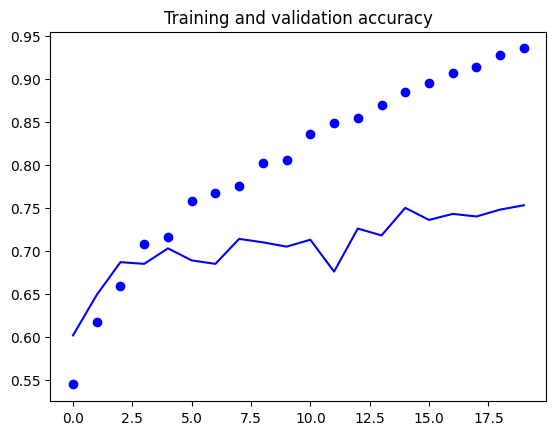

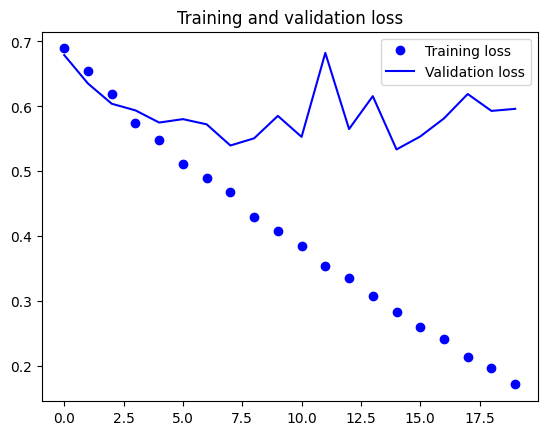

In [18]:
# Plot training results
plot_loss_acc(history)

From the results above, you'll see the training accuracy is more than 90%, and the validation accuracy is in the 70%-80% range. This is a great example of overfitting -- which in short means that it can do very well with images it has seen before, but not so well with images it hasn't.

Data augmentation

One simple method to avoid overfitting is to augment the images a bit. If you think about it, most pictures of a cat are very similar -- the ears are at the top, then the eyes, then the mouth etc. Things like the distance between the eyes and ears will always be quite similar too.

What if you tweak with the images a bit -- rotate the image, squash it, etc. That's what image augementation is all about. And there's an API that makes it easy!

Take a look at the ImageDataGenerator which you have been using to rescale the image. There are other properties on it that you can use to augment the image.


      # Updated to do image augmentation
      train_datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest')

These are just a few of the options available. Let's quickly go over it:

- `rotation_range` is a value in degrees (0–180) within which to randomly rotate pictures.
- `width_shift` and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
- `shear_range` is for randomly applying shearing transformations.
- `zoom_range` is for randomly zooming inside pictures.
- `horizontal_flip` is for randomly flipping half of the images horizontally. This is relevant when there are no assumptions of horizontal assymmetry (e.g. real-world pictures).
- `fill_mode` is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

Run the next cells to see the impact on the results. The code is similar to the baseline but the definition of `train_datagen` has been updated to use the parameters described above.



In [28]:
# Create new model
model_for_aug = create_model()

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations.
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest' ) 

test_datagen = ImageDataGenerator(rescale = 1/255)


# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir, # This is the soruce directory for training images
    target_size = (150,150), # All images will resized to 150*150
    batch_size = 20,
    # Since we use binary crossentropy loss, we need binary labels
    class_mode = 'binary' 
)

# Flow validation images in batches of 20 using test_datagen generator
validationgenerator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

# Train the new model
history_with_aug = model_for_aug.fit(
    train_generator,
    steps_per_epoch = 100, # 2000 images = batch_size * steps
    epochs = EPOCHS,
    validation_data = validation_generator,
    validation_steps = 50, # 1000 images = batch_size * steps
    verbose = 2
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
100/100 - 122s - loss: 0.6954 - accuracy: 0.5310 - val_loss: 0.6806 - val_accuracy: 0.6150 - 122s/epoch - 1s/step
Epoch 2/20
100/100 - 106s - loss: 0.6787 - accuracy: 0.5685 - val_loss: 0.6514 - val_accuracy: 0.6230 - 106s/epoch - 1s/step
Epoch 3/20
100/100 - 103s - loss: 0.6690 - accuracy: 0.5745 - val_loss: 0.6338 - val_accuracy: 0.6440 - 103s/epoch - 1s/step
Epoch 4/20
100/100 - 95s - loss: 0.6576 - accuracy: 0.5890 - val_loss: 0.6252 - val_accuracy: 0.6490 - 95s/epoch - 949ms/step
Epoch 5/20
100/100 - 97s - loss: 0.6390 - accuracy: 0.6290 - val_loss: 0.6049 - val_accuracy: 0.6730 - 97s/epoch - 972ms/step
Epoch 6/20
100/100 - 98s - loss: 0.6227 - accuracy: 0.6355 - val_loss: 0.5745 - val_accuracy: 0.7010 - 98s/epoch - 977ms/step
Epoch 7/20
100/100 - 99s - loss: 0.6114 - accuracy: 0.6765 - val_loss: 0.5691 - val_accuracy: 0.7130 - 99s/epoch - 989ms/step
Epoch 8/20
100/100 - 93s - loss: 0.60

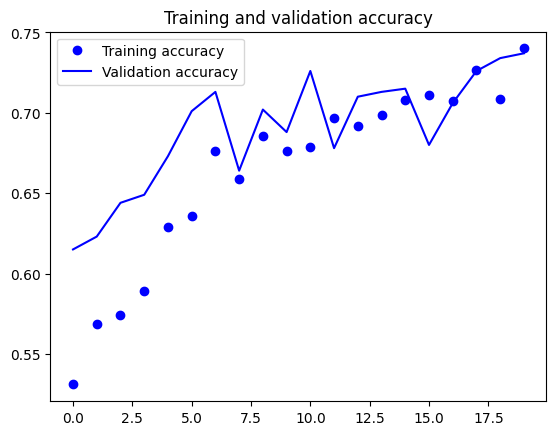

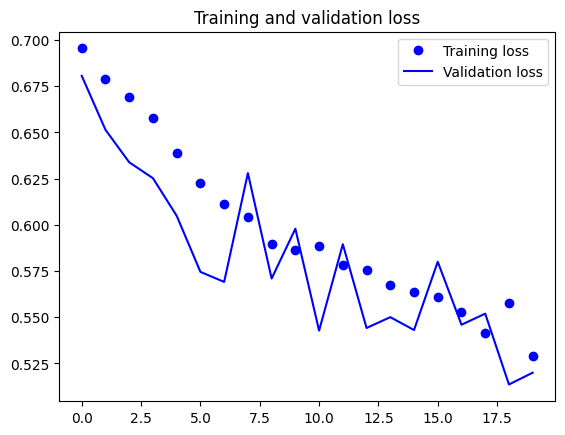

In [31]:
plot_loss_acc(history_with_aug)

As you can see, the training accuracy has gone down compared to the baseline. This is expected because (as a result of data augmentation) there are more variety in the images so the model will need more runs to learn from them. The good thing is the validation accuracy is no longer stalling and is more in line with the training results. This means that the model is now performing better on unseen data.

Wrap Up

This exercise showed a simple trick to avoid overfitting. You can improve your baseline results by simply tweaking the same images you have already. The ImageDataGenerator class has built-in parameters to do just that. Try to modify the values some more in the train_datagen and see what results you get.

Take note that this will not work for all cases. In the next lesson, Laurence will show a scenario where data augmentation will not help improve your validation accuracy.